In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-07-01 05:23:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 64.233.170.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  16.3MB/s    in 25s     

2023-07-01 05:23:36 (19.5 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import zipfile

zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os

for dirpath, dirnames, filesnames in os.walk('10_food_classes_all_data'):
    print(f"There are {len(dirnames)} directories and {len(filesnames)} files in {dirpath}")

There are 2 directories and 0 files in 10_food_classes_all_data
There are 10 directories and 0 files in 10_food_classes_all_data/train
There are 0 directories and 750 files in 10_food_classes_all_data/train/steak
There are 0 directories and 750 files in 10_food_classes_all_data/train/ice_cream
There are 0 directories and 750 files in 10_food_classes_all_data/train/ramen
There are 0 directories and 750 files in 10_food_classes_all_data/train/hamburger
There are 0 directories and 750 files in 10_food_classes_all_data/train/grilled_salmon
There are 0 directories and 750 files in 10_food_classes_all_data/train/sushi
There are 0 directories and 750 files in 10_food_classes_all_data/train/fried_rice
There are 0 directories and 750 files in 10_food_classes_all_data/train/chicken_curry
There are 0 directories and 750 files in 10_food_classes_all_data/train/chicken_wings
There are 0 directories and 750 files in 10_food_classes_all_data/train/pizza
There are 10 directories and 0 files in 10_food

In [ ]:
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [ ]:
# class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):

  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])

  plt.imshow(img)

  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape : {img.shape}")

  return img

In [ ]:
def plot_loss_curve(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')

    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()

    # Plot accracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')

    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()

In [ ]:
def load_and_prep_image(filename, img_shape=224):
    img = tf.io.read_file(filename)

    #decode
    img = tf.image.decode_image(img)
    img = tf.image.resize(img, size=[img_shape, img_shape])
    img = img/255.

    return img

def pred_and_plot(model, filename, class_names=class_names):
    img = load_and_prep_image(filename)

    pred = model.predict(tf.expand_dims(img, axis=0))
    pred_class = class_names[int(tf.round(pred))]

    plt.imshow(img)
    plt.title(f'Prediction: {pred_class}')
    plt.axis(False)
    return pred_class

# Become one with data

Image shape : (384, 512, 3)


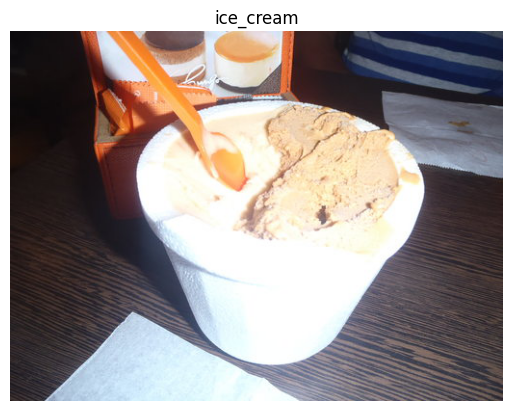

In [ ]:
img = view_random_image(train_dir, random.choice(class_names))

# Preprocessing the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# Create a model (making a baseline)
Creating a TinyVGG Convolution Neural Network Model.

In [ ]:
tf.random.set_seed(42)

model_1 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_1.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# history_1 = model_1.fit(train_data,
#                         epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=test_data,
#                         validation_steps=len(test_data))

# Evaluate the model

In [ ]:
model_1.evaluate(test_data)

79/79 [==============================] - 19s 155ms/step - loss: 2.3056 - accuracy: 0.1016


[2.3056299686431885, 0.10159999877214432]

In [ ]:
# plot_loss_curve(history_1)

# Adjust the model hyperparameters (beat baseline / reduce overfitting)

#Simplify the model

In [ ]:
model_2 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_2.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [ ]:
# history_2 = model_2.fit(train_data,
#                         epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=test_data,
#                         validation_steps=len(test_data))

In [ ]:
# plot_loss_curve(history_2)

# Data Augmentation

In [ ]:
train_datagen_aug = ImageDataGenerator(rescale=1/255.,
                                       rotation_range=0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True)

train_data_aug = train_datagen_aug.flow_from_directory(train_dir,
                                                       target_size=(224, 224),
                                                       batch_size=32,
                                                       class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
model_3 = tf.keras.models.clone_model(model_1)

model_3.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
history_3 = model_3.fit(train_data_aug,
                        epochs=5,
                        steps_per_epoch=len(train_data_aug),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 127s 521ms/step - loss: 2.2349 - accuracy: 0.1571 - val_loss: 2.0648 - val_accuracy: 0.2504
Epoch 2/5
235/235 [==============================] - 125s 532ms/step - loss: 2.1135 - accuracy: 0.2441 - val_loss: 1.9972 - val_accuracy: 0.2804
Epoch 3/5
235/235 [==============================] - 124s 527ms/step - loss: 2.0675 - accuracy: 0.2688 - val_loss: 1.9377 - val_accuracy: 0.3400
Epoch 4/5
235/235 [==============================] - 123s 525ms/step - loss: 2.0273 - accuracy: 0.2896 - val_loss: 1.8590 - val_accuracy: 0.3620
Epoch 5/5
235/235 [==============================] - 129s 547ms/step - loss: 1.9928 - accuracy: 0.3045 - val_loss: 1.8112 - val_accuracy: 0.3820


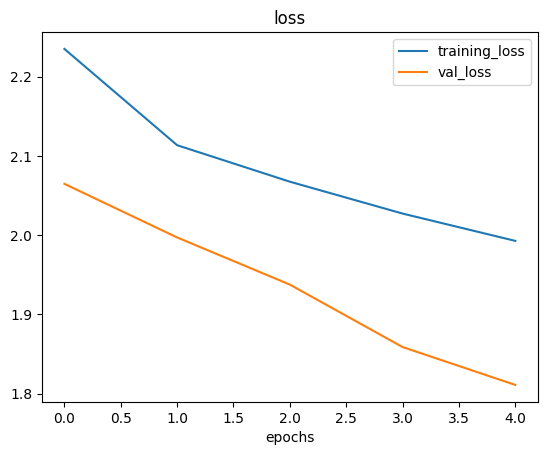

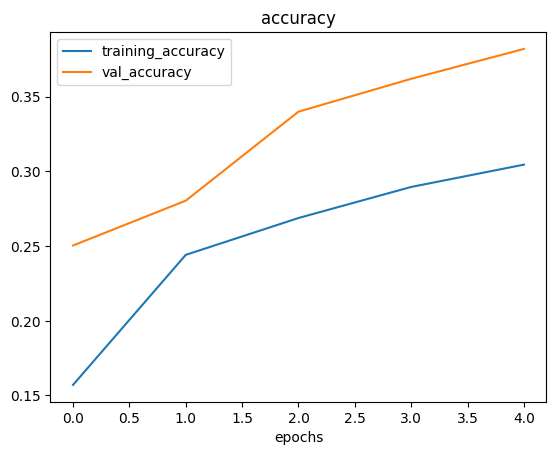

In [ ]:
plot_loss_curve(history_3)

In [ ]:
def random_image(target_dir, target_class):

  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])

  return img

def predPlotImg(model, class_names=class_names):
    target_class = random.choice(class_names)
    img = random_image(train_dir, target_class)
    img_shape = 224
    # img = tf.image.decode_image(img)
    img = tf.convert_to_tensor(img)
    img = tf.image.resize(img, size=[img_shape, img_shape])
    print(target_class)
    img = img/255.

    pred = model.predict(tf.expand_dims(img, axis=0))
    if (len(pred[0]) > 1):
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred[0]))]

    plt.imshow(img)
    plt.title(f'Prediction: {pred_class}')
    plt.axis(False)
    return pred_class

chicken_curry
1/1 [==============================] - 0s 208ms/step


'chicken_curry'

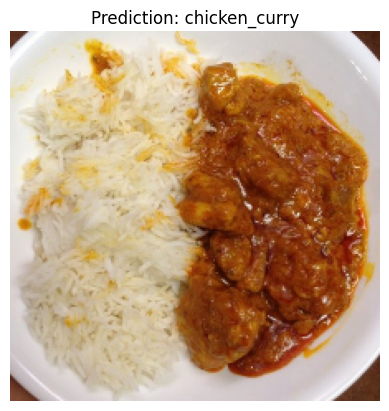

In [ ]:
predPlotImg(model_3, class_names)

In [ ]:
model_3.save('MuliclassImageClassification')

In [ ]:
load_model = tf.keras.models.load_model('MuliclassImageClassification')
load_model.evaluate(test_data)

79/79 [==============================] - 12s 151ms/step - loss: 1.8112 - accuracy: 0.3820


[1.8111721277236938, 0.38199999928474426]

In [ ]:
model_4 = tf.keras.models.clone_model(model_1)

model_4.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found
